In [1]:
import sys
sys.path.append('./libs')
import numpy as np
import cv2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import time

# PyConTW 2019

In [2]:
# Self-made packages
from denoise import bayes_denoise
from inpaint import bayes_inpaint
#from noisegen import *
from utils import *

In [4]:
# Import images
# Noisy cat
cat1 = cv2.imread('images/cat1_noisy.jpg')
cat1_clean = cv2.imread('images/cat1.jpg')

# Scratched cat and mask
cat2 = cv2.imread('images/cat2_scratched.jpg')
cat2_clean = cv2.imread('images/cat2.jpg')
cat2_mask = cv2.imread('images/cat2_mask.bmp',0) # Mask image should be binary

## 1 Bayeisan denoising

In [5]:
# Combining image
combo_noisy_im = cat1.copy()
combo_noisy_im[:,410:,:] = cat1_clean[:,410:,:].copy()

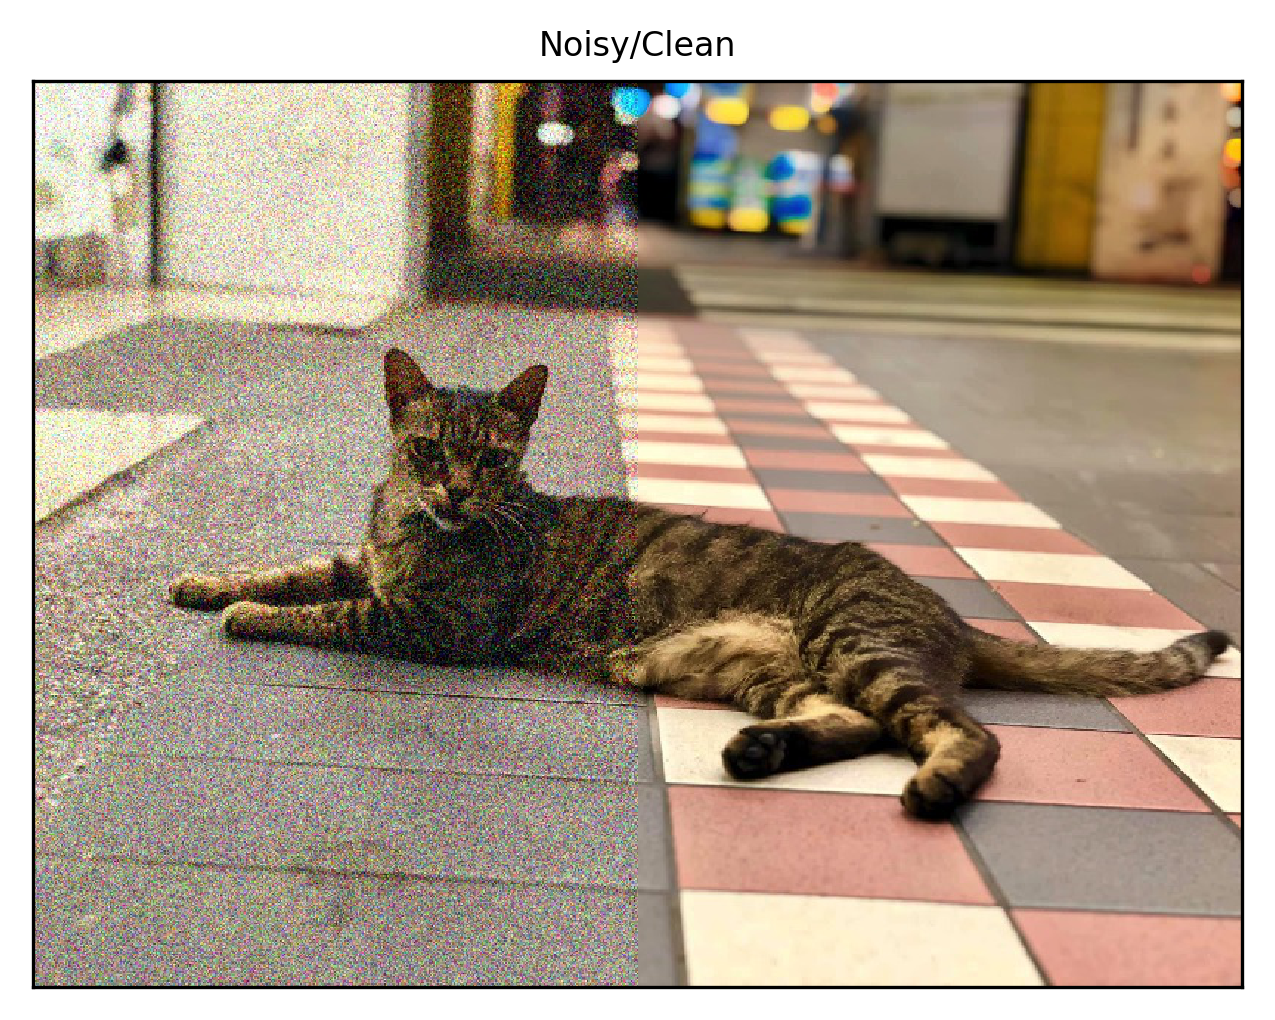

In [45]:
# Show clean/noisy image
plt.figure(dpi=150)
plt.imshow(combo_noisy_im[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.title('Noisy/Clean', fontsize=8)
plt.show()

In [7]:
# Running denoising
iters = 7
start = time.time()
cat_denoised = bayes_denoise(cat1, iters = iters, surplus = True)
end = time.time()
print('Total %d iterations cost %d mins and %.2f seconds'%(iters,(end-start)//60, (end-start)%60))

Total 10 iterations cost 10 mins and 56.96 seconds


In [8]:
# Python OpenCV arranges color channel in the order of BGR instead of RGB
# We have to rearrange it in order to display correctly by matplotlib imshow
cat_denoised_ls = []
for im in cat_denoised:
    cat_denoised_ls.append(im[:,:,::-1].copy())

In [9]:
display_seq(cat_denoised_ls, dpi=150)

interactive(children=(IntSlider(value=5, description='frame', max=10), Output()), _dom_classes=('widget-intera…

<function __main__.display_seq.<locals>._show(frame=(0, 10))>

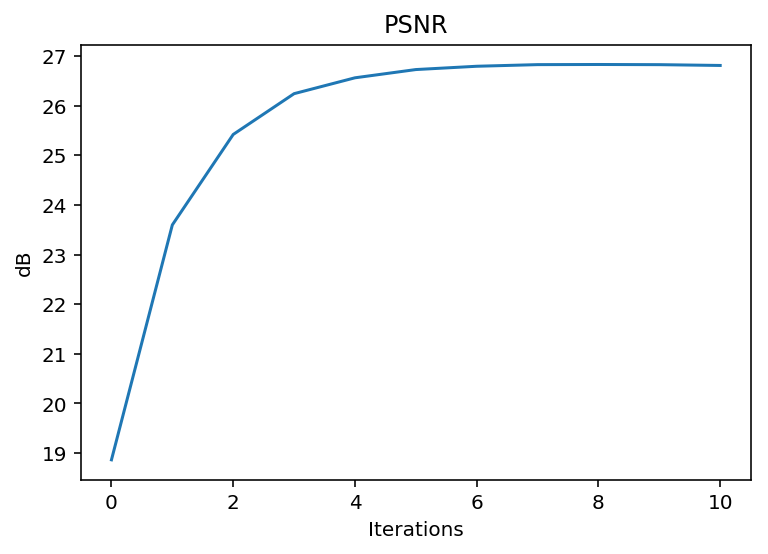

In [10]:
# Calculate PSNR index
cat_psnr = []
for i in range(len(cat_denoised)):
    cat_psnr.append(psnr(cat_denoised[i], cat1_clean))

plt.plot(np.arange(len(cat_denoised)),cat_psnr)
plt.xlabel('Iterations')
plt.ylabel('dB')
plt.title('PSNR')
plt.show()

# 2 Bayesian inpainting

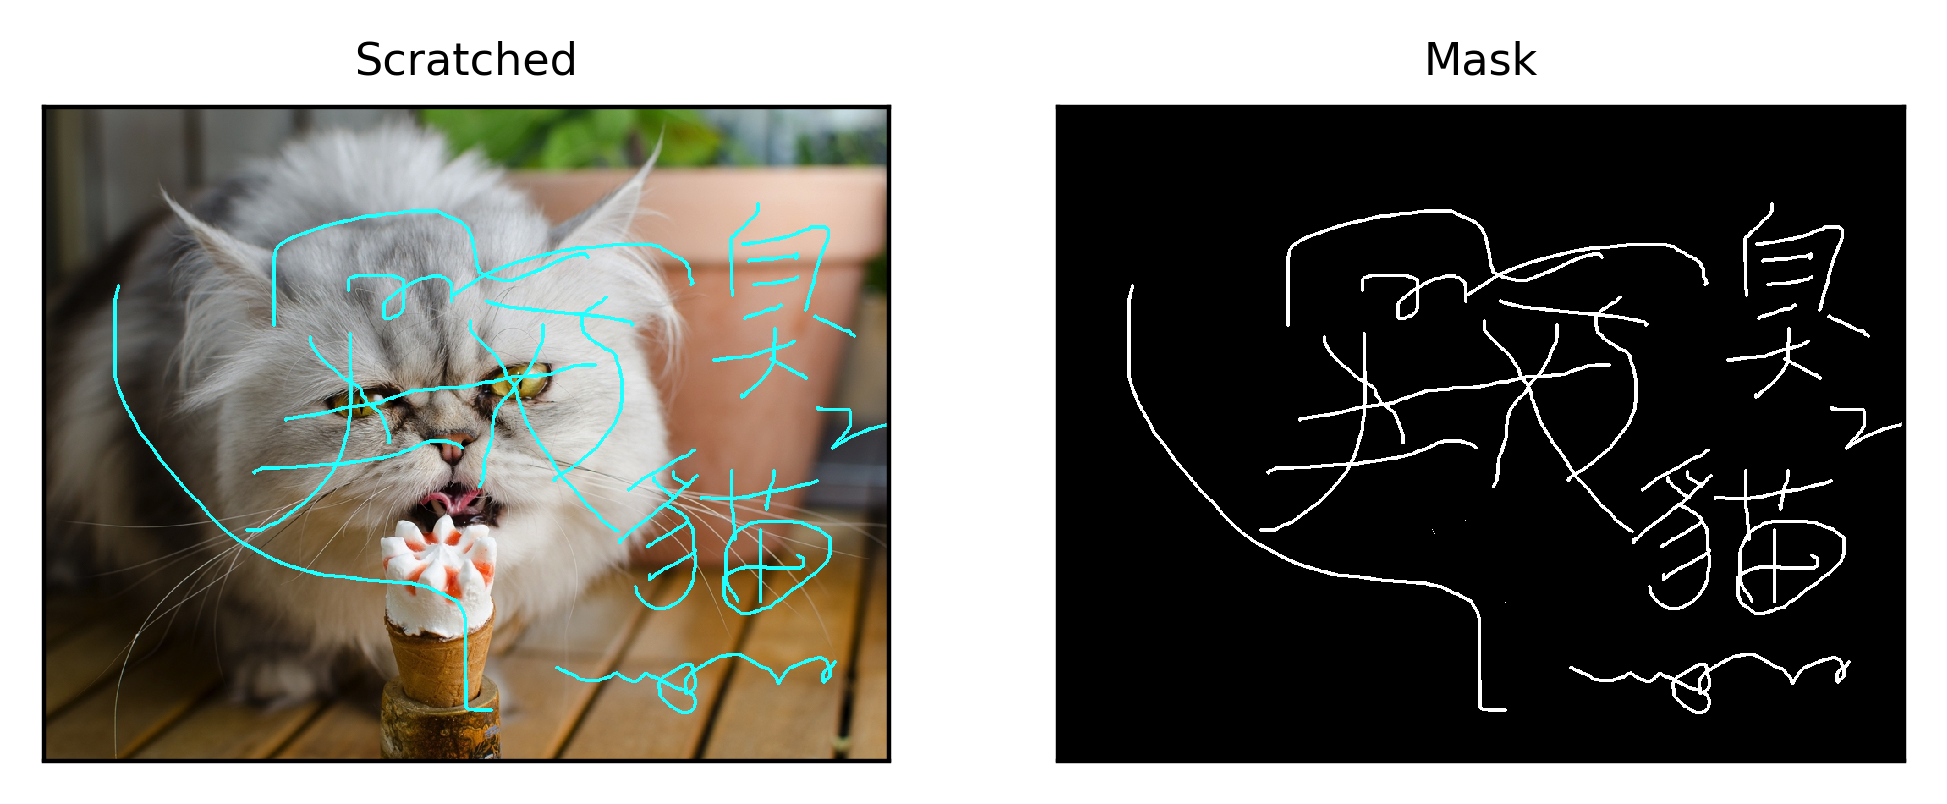

In [11]:
# Show scratched and mask images
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(cat2[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.title('Scratched', fontsize=8)

plt.subplot(122)
plt.imshow(cat2_mask, cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.title('Mask', fontsize=8)
plt.show()

In [12]:
# Running inpaint
iters = 5
start = time.time()
cat_inpaint = bayes_inpaint(cat2, cat2_mask, iters = iters, surplus = True)
end = time.time()
print('Total %d iteration(s) cost(s) %d min(s) and %.2f seconds'%(iters,(end-start)//60, (end-start)%60))

Total 5 iteration(s) cost(s) 0 min(s) and 40.54 seconds


In [13]:
# Rearranged the rank order that suits for matplotlib
cat_inpaint_ls = []
for im in cat_inpaint:
    cat_inpaint_ls.append(im[:,:,::-1].copy())

In [14]:
display_seq(cat_inpaint_ls, dpi=150)

interactive(children=(IntSlider(value=3, description='frame', max=6), Output()), _dom_classes=('widget-interac…

<function __main__.display_seq.<locals>._show(frame=(0, 6))>

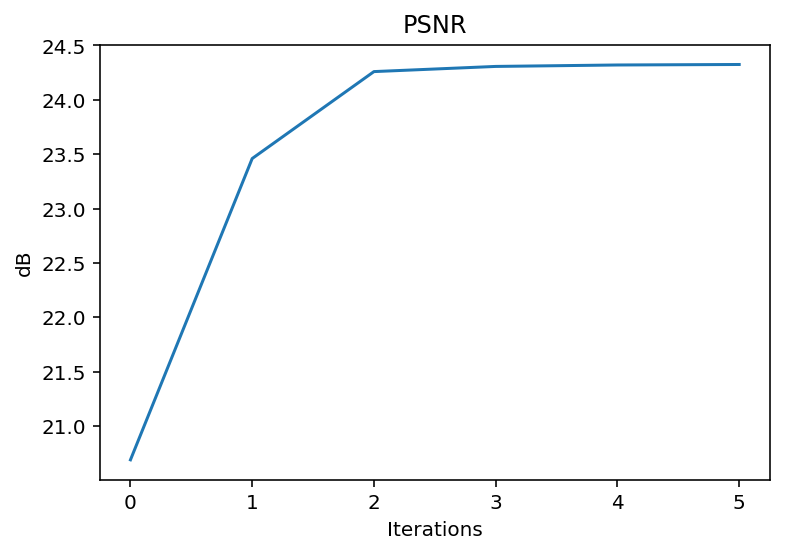

In [18]:
# Calculate PSNR index
cat2_psnr = []
for i in range(1,len(cat_inpaint)):
    cat2_psnr.append(psnr(cat_inpaint[i], cat2_clean))

plt.plot(np.arange(len(cat_inpaint)-1),cat2_psnr)
plt.xlabel('Iterations')
plt.ylabel('dB')
plt.title('PSNR')
plt.show()